
# Redes neuronales convolucionales


In [1]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.11.0


## Datos digits MNIST

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [6]:
from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)


(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [7]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 22s 37ms/step - loss: 0.8799 - accuracy: 0.7691
Epoch 2/5
600/600 [==============================] - 27s 45ms/step - loss: 0.2616 - accuracy: 0.9222
Epoch 3/5
600/600 [==============================] - 30s 50ms/step - loss: 0.1892 - accuracy: 0.9439
Epoch 4/5
600/600 [==============================] - 52s 86ms/step - loss: 0.1512 - accuracy: 0.9553
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.1081 - accuracy: 0.9687
Test accuracy: 0.9686999917030334


## Datos Fashion-MNIST

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

Modelo 1: modelo de base basado en el mismo modelo que el usado para el conjunto datos digits MNIST 

In [11]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.8233 - accuracy: 0.7089
Epoch 2/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.5102 - accuracy: 0.8184
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.4476 - accuracy: 0.8424
Epoch 4/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.4155 - accuracy: 0.8547
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.4211 - accuracy: 0.8503
Test accuracy: 0.8503000140190125


In [14]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

Volvemos las imagenes a formato original para hacer el plot

In [17]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

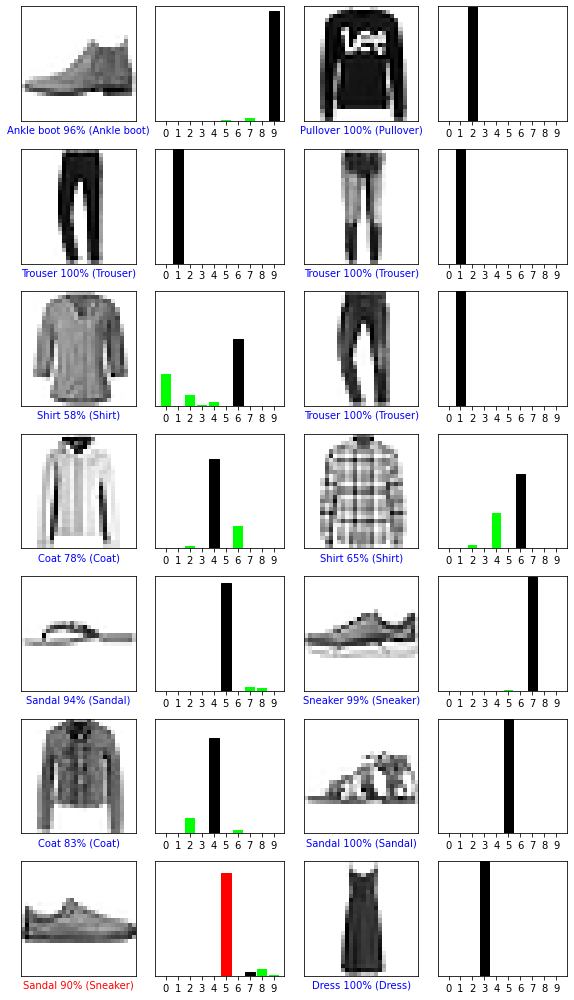

In [18]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)     
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [19]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


Modelo 2: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [20]:

model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [21]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 259s 138ms/step - loss: 0.7730 - accuracy: 0.7246
Epoch 2/5
1875/1875 [==============================] - 251s 134ms/step - loss: 0.4940 - accuracy: 0.8213
Epoch 3/5
1875/1875 [==============================] - 272s 145ms/step - loss: 0.4246 - accuracy: 0.8469
Epoch 4/5
1875/1875 [==============================] - 327s 174ms/step - loss: 0.3848 - accuracy: 0.8626
Epoch 5/5
313/313 [==============================] - 17s 51ms/step - loss: 0.3927 - accuracy: 0.8634

Test accuracy: 0.8633999824523926


Modelo 3: modelo 3 cambiando al optimizador 'adam'

In [22]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 321s 171ms/step - loss: 0.4080 - accuracy: 0.8525
Epoch 2/5
1875/1875 [==============================] - 279s 149ms/step - loss: 0.2695 - accuracy: 0.9015
Epoch 3/5
1875/1875 [==============================] - 264s 141ms/step - loss: 0.2288 - accuracy: 0.9154
Epoch 4/5
1875/1875 [==============================] - 250s 133ms/step - loss: 0.1969 - accuracy: 0.9260
Epoch 5/5
313/313 [==============================] - 12s 36ms/step - loss: 0.2616 - accuracy: 0.9064

Test accuracy: 0.9064000248908997


Modelo 4: Buscando un modelo más complejo que usa capas BathNormalization y Dropout

In [23]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model



In [24]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1582/1875 [========================>.....] - ETA: 2:41 - loss: 0.5357 - accuracy: 0.8149

KeyboardInterrupt: 

Modelo 5: Modelo anterior añadiendo más epochs (10 epochs)

In [32]:

model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.5098 - accuracy: 0.8217
Epoch 2/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3239 - accuracy: 0.8857
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2839 - accuracy: 0.8990
Epoch 4/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2501 - accuracy: 0.9107
Epoch 5/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2228 - accuracy: 0.9201
Epoch 6/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2050 - accuracy: 0.9273
Epoch 7/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.1893 - accuracy: 0.9324
Epoch 8/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1733 - accuracy: 0.9385
Epoch 9/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1661 - accuracy: 0.9

Modelo 6: Modelo anterior añadiendo más epochs (30 epochs)

In [33]:

model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 226us/sample - loss: 0.5218 - accuracy: 0.8189
Epoch 2/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3229 - accuracy: 0.8865
Epoch 3/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2865 - accuracy: 0.8982
Epoch 4/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2493 - accuracy: 0.9110
Epoch 5/30
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2243 - accuracy: 0.9214
Epoch 6/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2036 - accuracy: 0.9283
Epoch 7/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1881 - accuracy: 0.9330
Epoch 8/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1695 - accuracy: 0.9391
Epoch 9/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1597 - accuracy: 0.9

Modelo 7: Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador Adam

In [26]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model.fit(train_images, train_labels, epochs=30, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 228us/sample - loss: 0.5048 - accuracy: 0.8254
Epoch 2/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3187 - accuracy: 0.8865
Epoch 3/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2693 - accuracy: 0.9048
Epoch 4/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2380 - accuracy: 0.9158
Epoch 5/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2110 - accuracy: 0.9270
Epoch 6/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1849 - accuracy: 0.9345
Epoch 7/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1672 - accuracy: 0.9411
Epoch 8/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1503 - accuracy: 0.9476
Epoch 9/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1367 - accuracy: 0.9

Visualización de las predicciones del modelo 7

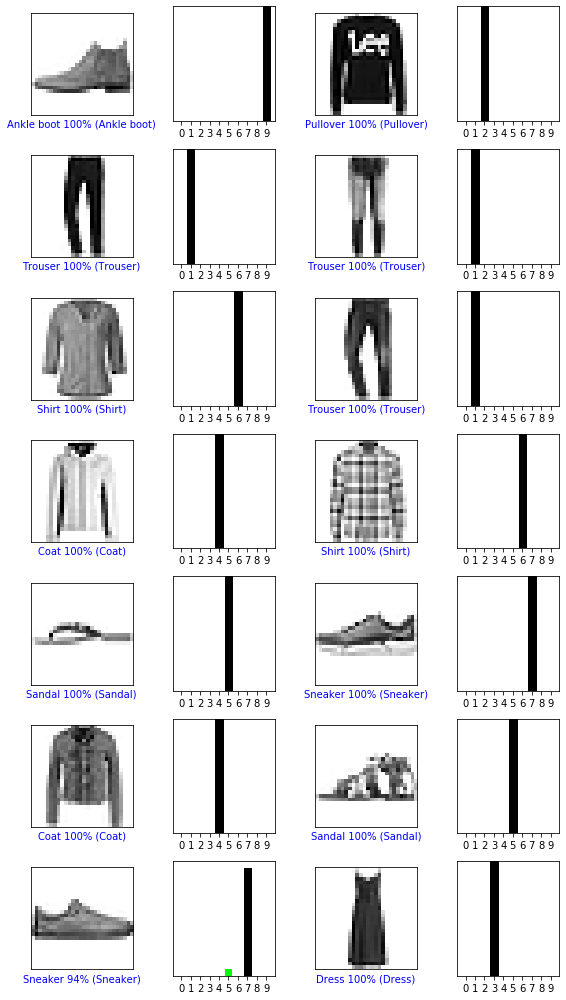

In [27]:

predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()